<a href="https://colab.research.google.com/github/hiroca/Prog2kakusin/blob/main/wirk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

画像処理について

In [33]:
!wget "https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc" -O images.zip
!unzip -o images.zip

--2024-01-16 08:06:36--  https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.100, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download [following]
--2024-01-16 08:06:37--  https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391994 (383K) [application/octet-stream]
Saving to: ‘images.zip’

images.zip          100%[===================>] 382.81K  --.-KB/s    in 0.1s

4or8or20:２０


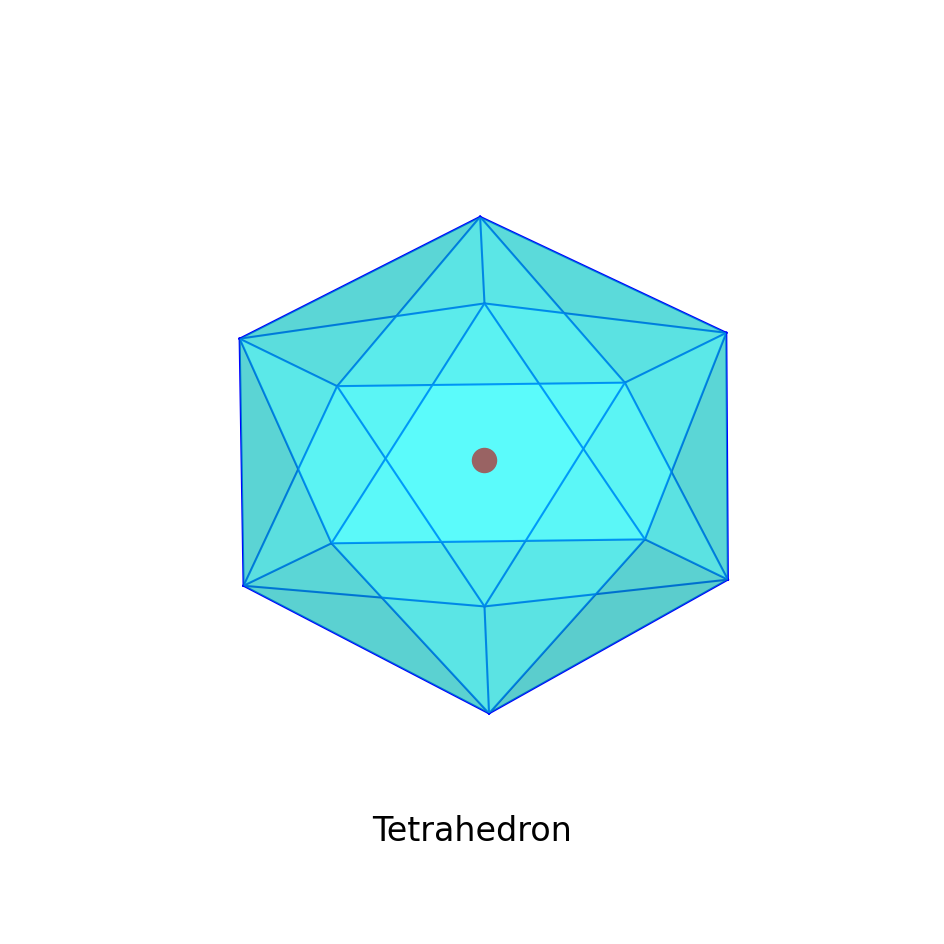

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

def plot_polyhedron(ax, VERTEX, EDGE, FACET):

    #グラフの描画
    for i in range(len(EDGE)):
        coordinates = np.array([VERTEX[EDGE[i][0]], VERTEX[EDGE[i][1]]])
        x, y, z = coordinates.T
        ax.plot(x, y, z,markersize=6, color='blue', linewidth=1.5)


    ls = LightSource(40, 70) #光源の設定
    # 面の塗りつぶし
    for i in range(len(FACET)):
        coordinates = np.array([VERTEX[FACET[i][0]], VERTEX[FACET[i][1]], VERTEX[FACET[i][2]]])
        x, y, z = coordinates.T
        ax.plot_trisurf(x, y, z, alpha=0.4, antialiased=True, shade=True,lightsource=ls,  color='cyan')

    # 任意の点のプロット
    ax.scatter(0, 0, 0, color='red', s=300)


    ax.set_axis_off() # 座標の透明化
    ax.view_init(elev=45, azim=35) # 視点の設定

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    return ax
a=int(input("4or8or20:"))
if a/4==1:
#正四面体
#頂点
  VERTEX = np.array([
       [ 0.      ,  0.      ,  1.      ], #0
       [ 0.942809,  0.      , -0.333333], #1
       [-0.471405,  0.816497, -0.333333], #2
       [-0.471405, -0.816497, -0.333333]  #3
  ])
#面と法線ベクトルと、面を構成する頂点
  FACET = np.array([
       [2, 0, 1], #0
       [3, 0, 2], #1
       [3, 1, 0], #2
       [3, 2, 1]  #3
  ])
#辺を構成する頂点
  EDGE = np.array([
       [0, 1],
       [1, 2],
       [2, 0],
       [2, 3],
       [3, 0],
       [3, 1]
  ])
elif a/4==2:
# 正八面体の情報
  VERTEX= np.array([
       [ 0.,  0.,  1.], #0
       [ 1.,  0.,  0.], #1
       [ 0.,  1.,  0.], #2
       [-1.,  0.,  0.], #3
       [-0., -1.,  0.], #4
       [ 0., -0., -1.]  #5
  ])
  FACET = np.array([
       [2, 0, 1], #0
       [3, 0, 2], #1
       [4, 0, 3], #2
       [4, 1, 0], #3
       [5, 1, 4], #4
       [5, 2, 1], #5
       [5, 3, 2], #6
       [5, 4, 3]  #7
  ])
  EDGE = np.array([
       [0, 1],
       [1, 2],
       [2, 0],
       [2, 3],
       [3, 0],
       [3, 4],
       [4, 0],
       [4, 1],
       [4, 5],
       [5, 1],
       [5, 2],
       [5, 3]
  ])
elif a/4==5:
# 正二十面体の情報
  VERTEX = np.array([ #12
  [ +0.000000, +0.000000, +1.000000 ],  #0
  [ +0.894427, +0.000000, +0.447214 ],  #1
  [ +0.276393, +0.850651, +0.447214 ],  #2
  [ -0.723607, +0.525731, +0.447214 ],  #3
  [ -0.723607, -0.525731, +0.447214 ],  #4
  [ +0.276393, -0.850651, +0.447214 ],  #5
  [ +0.723607, -0.525731, -0.447214 ],  #6
  [ +0.723607, +0.525731, -0.447214 ],  #7
  [ -0.276393, +0.850651, -0.447214 ],  #8
  [ -0.894427, -0.000000, -0.447214 ],  #9
  [ -0.276393, -0.850651, -0.447214 ],  #10
  [ -0.000000, +0.000000, -1.000000 ],  #11
  ])

  FACET = np.array([ #20
  ( +0.491123, +0.356822, +0.794654 ), (  2,  0,  1 ),  #0
  ( -0.187592, +0.577350, +0.794654 ), (  3,  0,  2 ),  #1
  ( -0.607062, +0.000000, +0.794654 ), (  4,  0,  3 ),  #2
  ( -0.187592, -0.577350, +0.794654 ), (  5,  0,  4 ),  #3
  ( +0.491123, -0.356822, +0.794654 ), (  5,  1,  0 ),  #4
  ( +0.794654, -0.577350, +0.187592 ), (  6,  1,  5 ),  #5
  ( +0.982247, -0.000000, -0.187592 ), (  7,  1,  6 ),  #6
  ( +0.794654, +0.577350, +0.187592 ), (  7,  2,  1 ),  #7
  ( +0.303531, +0.934172, -0.187592 ), (  8,  2,  7 ),  #8
  ( -0.303531, +0.934172, +0.187592 ), (  8,  3,  2 ),  #9
  ( -0.794654, +0.577350, -0.187592 ), (  9,  3,  8 ),  #10
  ( -0.982247, -0.000000, +0.187592 ), (  9,  4,  3 ),  #11
  ( -0.794654, -0.577350, -0.187592 ), ( 10,  4,  9 ),  #12
  ( -0.303531, -0.934172, +0.187592 ), ( 10,  5,  4 ),  #13
  ( +0.303531, -0.934172, -0.187592 ), ( 10,  6,  5 ),  #14
  ( +0.187592, -0.577350, -0.794654 ), ( 11,  6, 10 ),  #15
  ( +0.607062, +0.000000, -0.794654 ), ( 11,  7,  6 ),  #16
  ( +0.187592, +0.577350, -0.794654 ), ( 11,  8,  7 ),  #17
  ( -0.491123, +0.356822, -0.794654 ), ( 11,  9,  8 ),  #18
  ( -0.491123, -0.356822, -0.794654 ), ( 11, 10,  9 ),  #19
  ])

  EDGE = np.array([
  [  0,  1], [  1,  2], [  2,  0], [  2,  3],
  [  3,  0], [  3,  4], [  4,  0], [  4,  5],
  [  5,  0], [  5,  1], [  5,  6], [  6,  1],
  [  6,  7], [  7,  1], [  7,  2], [  7,  8],
  [  8,  2], [  8,  3], [  8,  9], [  9,  3],
  [  9,  4], [  9, 10], [ 10,  4], [ 10,  5],
  [ 10,  6], [ 10, 11], [ 11,  6], [ 11,  7],
  [ 11,  8], [ 11,  9],
  ])

  FACET=FACET[1::2].astype(int)
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(1,1,1, projection='3d')
ax = plot_polyhedron(ax, VERTEX, EDGE, FACET)
ax.set_title(r"Tetrahedron", y=0.1, size=24)
plt.show()
#fig.savefig('rittai.jpg')

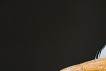

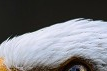

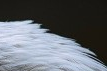

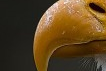

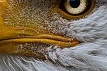

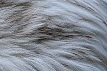

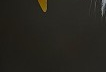

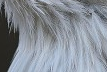

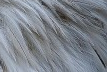

In [41]:
import numpy as np
import cv2, sys
from google.colab.patches import cv2_imshow

file = "eagle.jpg"
img = cv2.imread( file )
if img is None:
  sys.exit(f'エラー: ファイルを開けませんでした {file}')
imgs=[]
h = img.shape[0] # 画像の高さ
w = img.shape[1] # 画像の幅
img1=img[0:int(h/3),0:int(w/3)]#1
img2=img[0:int(h/3),int(w/3):int(w/3*2)]#2
img3=img[0:int(h/3),int(w/3*2):w]#3
img4=img[int(h/3):int(h/3*2),0:int(w/3)]#4
img5=img[int(h/3):int(h/3*2),int(w/3):int(w/3*2)]#5
img6=img[int(h/3):int(h/3*2),int(w/3*2):w]#6
img7=img[int(h/3*2):h,0:int(w/3)]#7
img8=img[int(h/3*2):h,int(w/3):int(w/3*2)]#8
img9=img[int(h/3*2):h,int(w/3*2):w]#9
imgs.append(img1)
imgs.append(img2)
imgs.append(img3)
imgs.append(img4)
imgs.append(img5)
imgs.append(img6)
imgs.append(img7)
imgs.append(img8)
imgs.append(img9)
img0 = np.zeros((480,640,3), np.uint8)